This Machine Learning Project is focused on classifying American Sign Language (ASL) hand sign. Specifically only the hands signs that represent the letters of the alphabet. The hand signs are represented in images that are retrieved from Kaggle.

Aside from just classifiying the hand signs, this project uses two distinct models to determine if neural networks or ensamble models are more accurate at classifying the hand signs.The two models being RandomForest(ensamble of decision trees) and ResNet50(neural network).

Note: GPU should be on if running this in Colab to allow ResNet50 to run faster.

In [1]:
!pip install kagglehub

In [2]:
!pip install "numpy<2" opencv-python mediapipe

In [3]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
import string
path = kagglehub.dataset_download("danrasband/asl-alphabet-test")

print("Path to dataset files:", path)

root = os.path.join(path, "asl_dataset")
print("Using dataset root:", root)

print("Root path:", path)
print("\nFolders inside dataset:")
print(os.listdir(path))

letters_only = [folder for folder in os.listdir(path) if folder in string.ascii_uppercase]

print("\nLetters only folders inside dataset:")
print(letters_only)

100%|██████████| 24.3M/24.3M [00:00<00:00, 66.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/danrasband/asl-alphabet-test/versions/1
Using dataset root: /root/.cache/kagglehub/datasets/danrasband/asl-alphabet-test/versions/1/asl_dataset
Root path: /root/.cache/kagglehub/datasets/danrasband/asl-alphabet-test/versions/1

Folders inside dataset:
['Z', 'O', 'R', 'I', 'N', 'D', 'A', 'X', 'Q', 'B', 'C', 'J', 'del', 'asl-alphabet-test', 'P', 'E', 'G', 'W', 'space', 'U', 'Y', 'H', 'S', 'nothing', 'M', 'L', 'F', 'V', 'K', 'T']

Letters only folders inside dataset:
['Z', 'O', 'R', 'I', 'N', 'D', 'A', 'X', 'Q', 'B', 'C', 'J', 'P', 'E', 'G', 'W', 'U', 'Y', 'H', 'S', 'M', 'L', 'F', 'V', 'K', 'T']


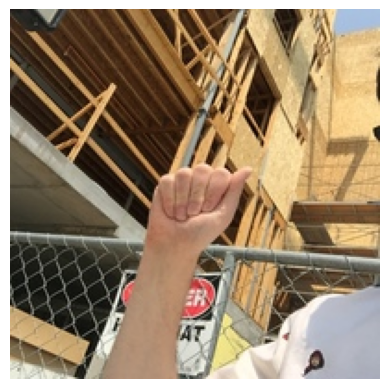

In [4]:
root = path
class_folder = os.path.join(root, "A")

# Pick the first image
img_path = os.path.join(class_folder, os.listdir(class_folder)[0])

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()


**Pre-processing - labeling images**

Each folder is labeled, which is the basis for the label of each image below.

In [5]:
IMG_SIZE = 64

X = []
y = []

for label in os.listdir(root):
    class_folder = os.path.join(root, label)

    if label not in string.ascii_uppercase:
      continue

    if not os.path.isdir(class_folder):
        continue

    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)

        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        X.append(img.flatten())
        y.append(label)
X = np.array(X)
y = np.array(y)

print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)

Feature matrix shape: (780, 4096)
Labels shape: (780,)


**RandomForest configuration and processing**

**ResNet50 configuration and processing**

For the processing of ResNet50, we start by training it on the Kaggle dataset and do not use the pretrained weights to classify the imaages. This is because we want to determine how well the model compares to RandomForest and using added weights gives ResNet50 an unfair advantage.

In [8]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import OneHotEncoder

# ResNet50 expects image size 224, 224, but using 64 for consitency and speed to train
IMAGE_SIZE = [IMG_SIZE, IMG_SIZE, 1]

X_shaped = X.reshape(-1,64,64,1)/255

# labelsEncoded = LabelBinarizer()
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(np.array(y).reshape(-1,1))

#Number of Passes
EPOCHS = 50

#No weights means no pretrained data
base_ResNet = ResNet50(weights=None, include_top=False, input_shape=IMAGE_SIZE)

X_RN = base_ResNet.output
X_RN = GlobalAveragePooling2D()(X_RN)
X_RN = Flatten()(X_RN)





**Reasources and Sources**

https://www.geeksforgeeks.org/dsa/random-forest-classifier-using-scikit-learn/

https://www.geeksforgeeks.org/computer-vision/image-classification-using-resnet/

Tutorial of using ResNet50 for detecting aliens and preditors as images.
https://www.youtube.com/watch?v=5SJAPmQy7xs&t=2s